# Основные методы поиска оценок

## Задача 1

<div style="text-align: justify">
(К теоретической задаче 3.1) Сгенерируйте выборки $X_1, \ldots, X_N$ из всех распределений из задачи 3.1 $(N = 1000).$ Для всех $n \leq N$ посчитайте значения полученных оценок (по выборке $X_1, \ldots X_n$) методом
моментов. Оцените дисперсию каждой оценки, сгенерировав для каждой из них $K = 1000$ бутстрепных выборок а) с помощью параметрического бутстрепа, б) с помощью непараметрического бутстрепа. Проведите эксперимент для разных значений параметров распределений (рассмотрите не менее трех различных значений).
</div>

### Теоретическая часть

Оценки по методу моментов для распределений:
1. $\mathcal{N}(a, \sigma^{2}):$ $$\theta^{*} = (\overline{X}, S^{2})$$
2. $\Gamma(\alpha, \lambda):$ $$\theta^{*} = \left(\frac{\overline{X}}{S^{2}}, \frac{\overline{X}^{2}}{S^{2}}\right)$$
3. $R(a, b):$ $$\theta^{*} = (\overline{X} - \sqrt{3S^{2}}, \overline{X} + \sqrt{3S^{2}})$$
4. $Pois(\lambda):$ $$\theta^{*} = \overline{X}$$
5. $Bin(n, p):$ $$\theta^{*} = \left(\frac{\overline{X} - S^{2}}{\overline{X}}, \frac{\overline{X}^{2}}{\overline{X} - S^{2}}\right)$$
6. $Geom(p):$ $$\theta^{*} = \frac{1}{\overline{X} + 1}$$
7. $Beta(\alpha, \beta):$ $$\theta^{*} = \left(\frac{\overline{X}(\overline{X} - \overline{X^{2}})}{S^{2}}, \frac{(\overline{X} - \overline{X^{2}})(1 - \overline{X})}{S^{2}}\right)$$
8. $Pareto(\gamma):$ $$\theta^{*} = \frac{\overline{X}}{\overline{X} - 1}$$
9. $Cauchy(\theta):$ $$\theta^{*} = \tan^{-1}{(\pi \overline{I(X \in [0, 1])})}$$

### План решения

1. Создадим массивы для выборок из каждого распределения для трех различных параметров соответствующих распределений.
2. Посчитаем значения оценок, полученных с помощью метода моментов для всех $n \leq N$ для каждого распределения.
3. Посчитаем значения бутстрепной оценки дисперсии для параметрического и непараметрического бутстрепа для каждого распределения.
4. Построим графики зависимости полученных оценок дисперсии от размера выборки для каждого распределения.

In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#задаем размер выборки, количество бутстрепных выборок и количество различных значений параметров распределений
N = 1000
K = 1000
N_series = 3

In [3]:
# создаем массивы для выборок
samples_norm = np.zeros((N_series, N))
samples_gamma = np.zeros((N_series, N))
samples_uniform = np.zeros((N_series, N))
samples_pois = np.zeros((N_series, N))
samples_bin = np.zeros((N_series, N))
samples_geom = np.zeros((N_series, N))
samples_beta = np.zeros((N_series, N))
samples_pareto = np.zeros((N_series, N))
samples_cauchy = np.zeros((N_series, N))

#создаем массивы для параметров распределений
params_norm = np.array([(0.5, 1.), (2., 3.), (1., 2.)])
params_gamma = np.array([(3., 2.), (1., 2.), (4., 5.)])
params_uniform = np.array([(0., 1.), (1., 4.), (2., 3.)])
params_pois = np.array([0.2, 0.5, 1.4])
params_bin = np.array([(100, 0.2), (50, 0.6), (85, 0.8)])
params_geom = np.array([0.2, 0.5, 0.75])
params_beta = np.array([(2., 5.), (4., 2.), (3., 3.)])
params_pareto = np.array([2, 5, 7])
params_cauchy = np.array([2., 4.5, 10.])

In [4]:
# генерируем выборки и заполняем массивы
for i in range(N_series):
    samples_norm[i] = sts.norm.rvs(loc = params_norm[i][0], scale = params_norm[i][1], size = N)
    samples_gamma[i] = sts.gamma.rvs(a = params_gamma[i][0], scale = params_gamma[i][1], size = N)
    samples_uniform[i] = sts.uniform.rvs(loc = params_uniform[i][0], scale = params_uniform[i][1] - params_uniform[i][0], size = N)
    samples_pois[i] = sts.poisson.rvs(params_pois[i], size = N)
    samples_bin[i] = sts.binom.rvs(int(params_bin[i][0]), params_bin[i][1], size = N)
    samples_geom[i] = sts.geom.rvs(params_geom[i], size = N)
    samples_beta[i] = sts.beta.rvs(params_beta[i][0], params_beta[i][1], size = N)
    samples_pareto[i] = sts.pareto.rvs(params_pareto[i], size = N)
    samples_cauchy[i] = sts.cauchy.rvs(scale = params_cauchy[i], size = N)

In [5]:
# функция для построения графиков
def make_plot(param_variance_estimator, non_param_variance_estimator, param, distr, ylim = 1):
    plt.figure(figsize = (12, 7))
    plt.ylim(0, ylim)
    plt.plot(param_variance_estimator, label = 'parametrical bootstrap')
    plt.plot(non_param_variance_estimator, label = 'non-parametrical bootstrap')
    plt.title('Bootstrap estimator of variance for parameter {} in {} distribution'.format(param, distr), fontsize = 14)
    plt.ylabel(r'$s^{2}$', fontsize = 12)
    plt.xlabel('Sample size', fontsize = 12)
    plt.legend(loc = 'best', prop = {'size': 12})
    plt.grid()
    plt.show()

### Normal distribution

In [6]:
# оценки по методу моментов
a = np.zeros((N_series, N))
sigma_2 = np.zeros((N_series, N))

for i in range(N_series):
    a[i] = np.array([samples_norm[i][:n].mean() for n in np.cumsum(np.ones(N, int))])
    sigma_2[i] = np.array([samples_norm[i][:n].var() for n in np.cumsum(np.ones(N, int))])

In [7]:
%%time

norm_non_param_variances = np.zeros((N_series, 2, N))

#non parametric bootstrap
for j in range(N_series):
    norm_non_param_variance = np.zeros((2, N))
    for i in range(1, N):
        norm_non_param_sample = np.random.choice(samples_norm[j][:(i + 1)], size = (K, N))
        a_estimator = np.mean(norm_non_param_sample, axis = 1)
        sigma_2_estimator = np.var(norm_non_param_sample, axis = 1)
        norm_non_param_variance[0][i] = a_estimator.var()
        norm_non_param_variance[1][i] = sigma_2_estimator.var()
    norm_non_param_variances[j][0] = norm_non_param_variance[0]
    norm_non_param_variances[j][1] = norm_non_param_variance[1]

CPU times: user 2min 46s, sys: 2.18 s, total: 2min 48s
Wall time: 42.2 s


In [8]:
%%time

norm_param_variances = np.zeros((N_series, 2, N))

#parametric bootstrap
for j in range(N_series):
    norm_param_variance = np.zeros((2, N))
    for i in range(N):
        norm_param_sample = sts.norm.rvs(a[j][i], sigma_2[j][i], size = (K, N))
        a_estimator = np.mean(norm_param_sample, axis = 1)
        sigma_2_estimator = np.var(norm_param_sample, axis = 1)
        norm_param_variance[0][i] = a_estimator.var()
        norm_param_variance[1][i] = sigma_2_estimator.var()
    norm_param_variances[j][0] = norm_param_variance[0]
    norm_param_variances[j][1] = norm_param_variance[1]

CPU times: user 8min 8s, sys: 6.12 s, total: 8min 14s
Wall time: 2min 3s


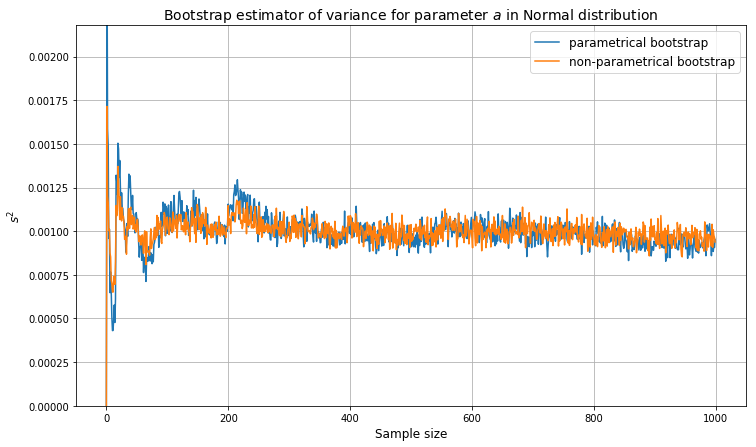

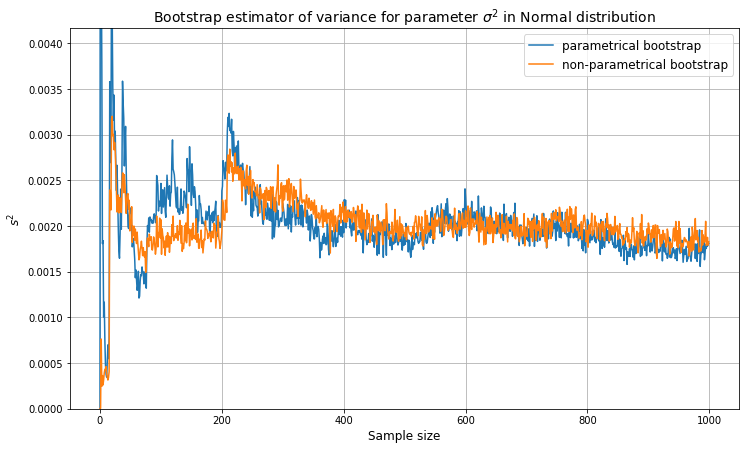

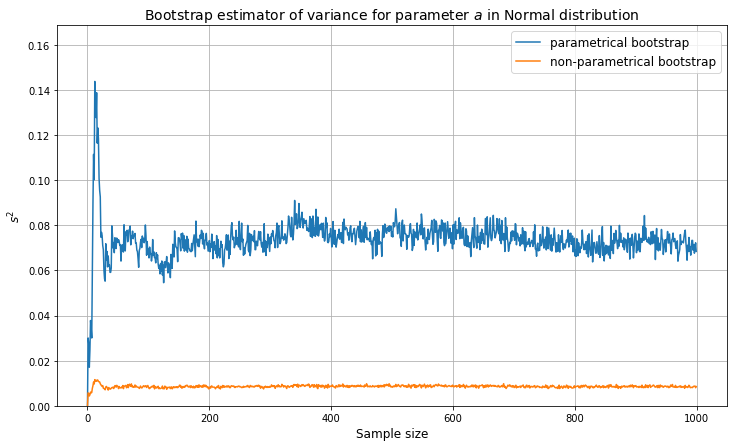

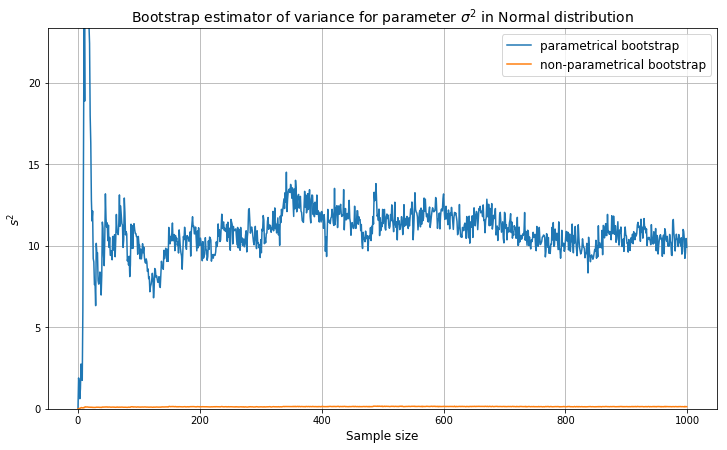

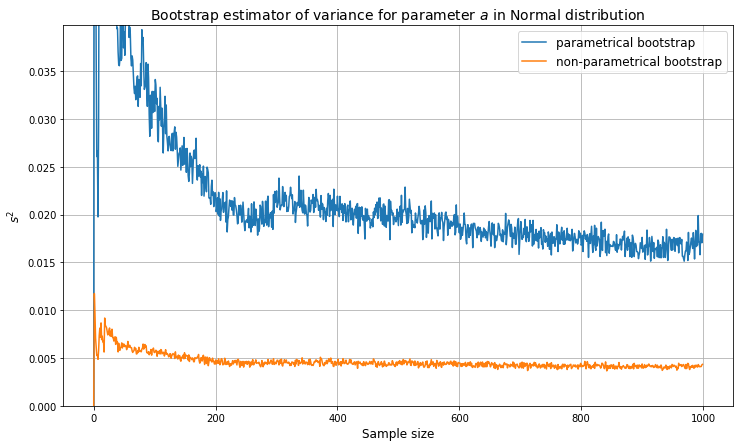

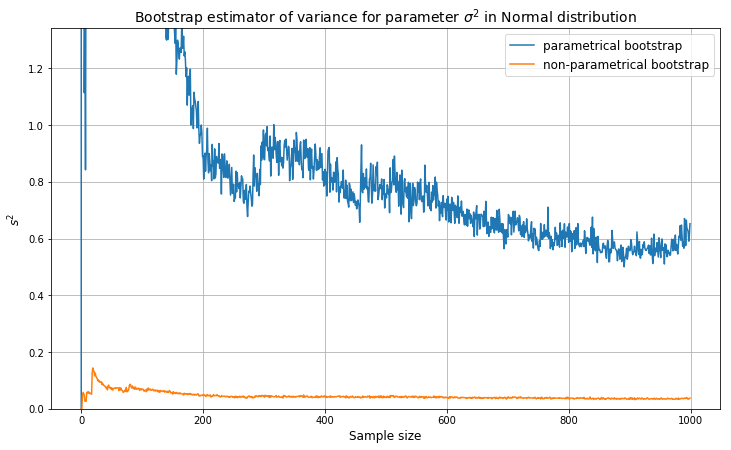

In [9]:
for j in range(N_series):
    make_plot(norm_param_variances[j][0], norm_non_param_variances[j][0], r'$a$', 'Normal',
              ylim = 2 * max(np.max(norm_param_variances[j][0][-100:]), np.max(norm_non_param_variances[j][0][-100:])))
    make_plot(norm_param_variances[j][1], norm_non_param_variances[j][1], r'$\sigma^{2}$', 'Normal',
              ylim = 2 * max(np.max(norm_param_variances[j][1][-100:]), np.max(norm_non_param_variances[j][1][-100:])))

### Gamma distribution

In [10]:
# оценки по методу моментов
alpha = np.zeros((N_series, N - 1))
lambdas = np.zeros((N_series, N - 1))

for j in range(N_series):
    alpha[j] = np.array([samples_gamma[j][:n].mean() ** 2 / samples_gamma[j][:n].var() for n in range(2, N + 1)])
    lambdas[j] = np.array([samples_gamma[j][:n].mean() / samples_gamma[j][:n].var() for n in range(2, N + 1)])

In [11]:
%%time

gamma_non_param_variances = np.zeros((N_series, 2, N - 1))

#non parametric bootstrap
for j in range(N_series):
    gamma_non_param_variance = np.zeros((2, N - 1))
    for i in range(N - 1):
        gamma_non_param_sample = np.random.choice(samples_gamma[j][:(i + 2)], size = (K, N))
        alpha_estimator = (np.mean(gamma_non_param_sample, axis = 1) ** 2) / np.var(gamma_non_param_sample, axis = 1)
        lambda_estimator = np.mean(gamma_non_param_sample, axis = 1) / np.var(gamma_non_param_sample, axis = 1)
        gamma_non_param_variance[0][i] = alpha_estimator.var()
        gamma_non_param_variance[1][i] = lambda_estimator.var()
    gamma_non_param_variances[j][0] = gamma_non_param_variance[0]
    gamma_non_param_variances[j][1] = gamma_non_param_variance[1]

CPU times: user 4min 5s, sys: 9.75 s, total: 4min 14s
Wall time: 1min 3s


In [12]:
%%time

gamma_param_variances = np.zeros((N_series, 2, N - 1))

#parametric bootstrap
for j in range(N_series):
    gamma_param_variance = np.zeros((2, N - 1))
    for i in range(N - 1):
        gamma_param_sample = sts.gamma.rvs(a = alpha[j][i], scale = 1. / lambdas[j][i], size = (K, N))
        alpha_estimator = (np.mean(gamma_param_sample, axis = 1) ** 2) / np.var(gamma_param_sample, axis = 1)
        lambda_estimator = np.mean(gamma_param_sample, axis = 1) / np.var(gamma_param_sample, axis = 1)
        gamma_param_variance[0][i] = alpha_estimator.var()
        gamma_param_variance[1][i] = lambda_estimator.var()
    gamma_param_variances[j][0] = gamma_param_variance[0]
    gamma_param_variances[j][1] = gamma_param_variance[1]

CPU times: user 16min 47s, sys: 13.1 s, total: 17min 1s
Wall time: 4min 15s


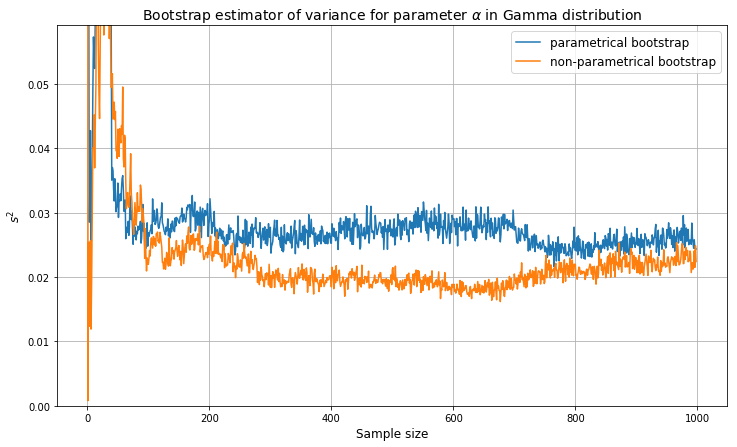

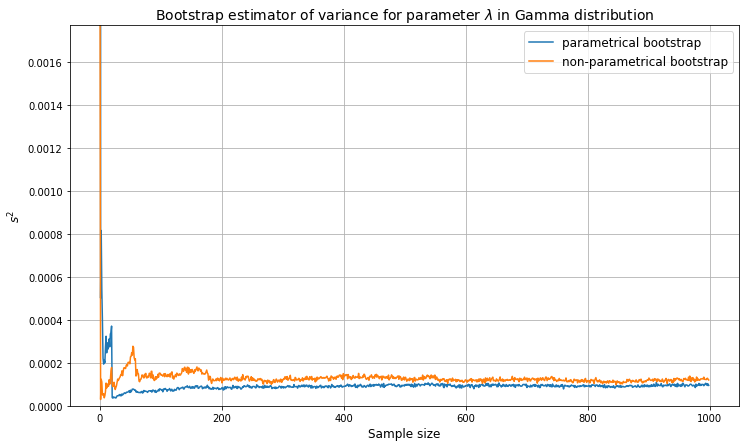

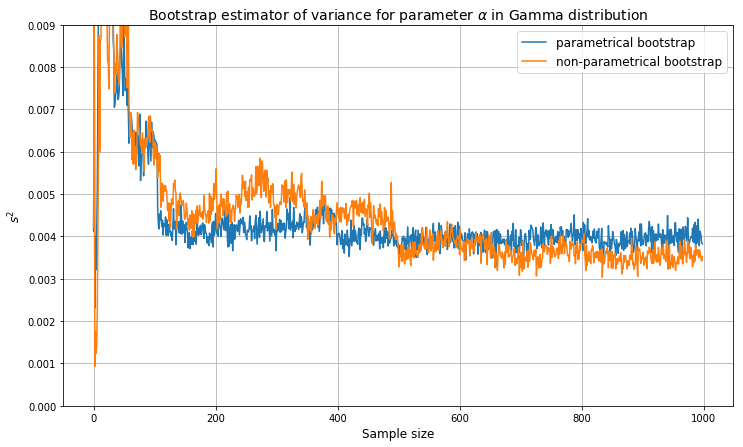

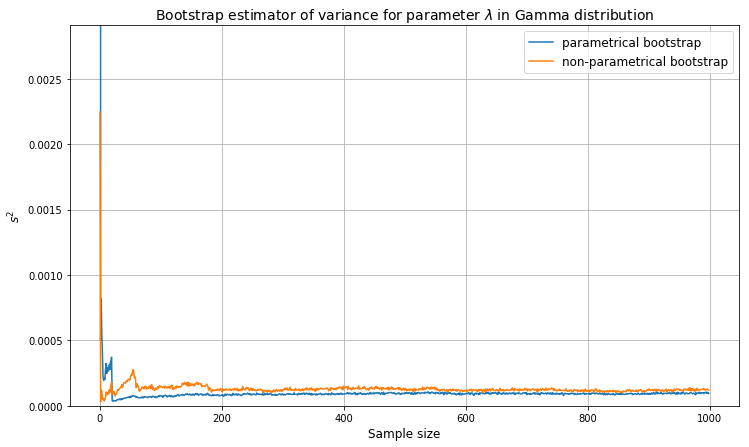

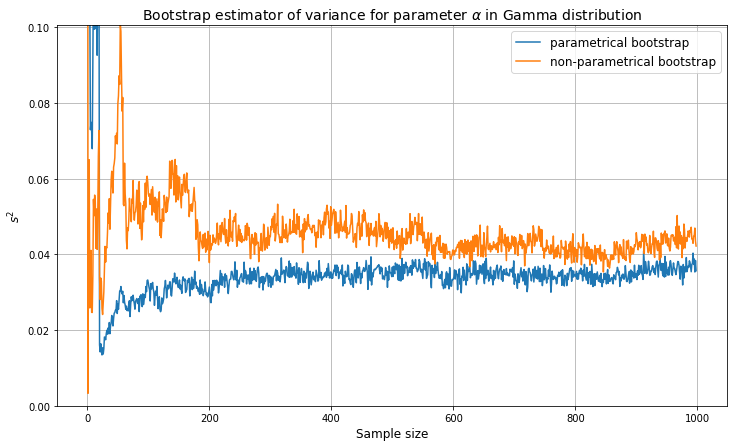

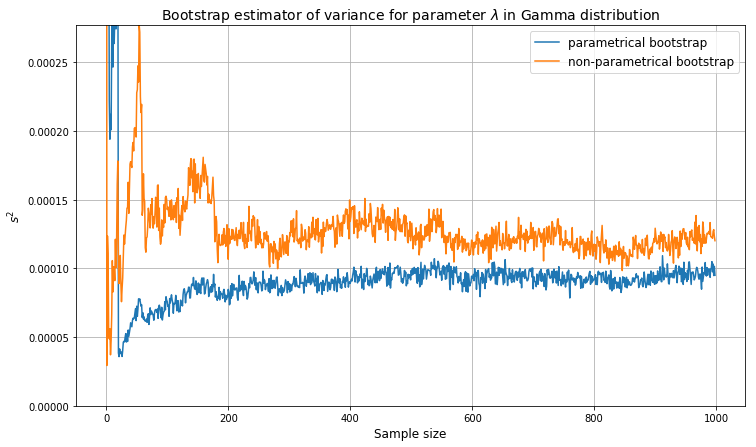

In [13]:
for j in range(N_series):
    make_plot(gamma_param_variances[j][0], gamma_non_param_variances[j][0], r'$\alpha$', 'Gamma',
              ylim = 2 * max(np.max(gamma_param_variances[j][0][-200:]), np.max(gamma_non_param_variances[j][0][-200:])))
    make_plot(gamma_param_variance[1], gamma_non_param_variance[1], r'$\lambda$', 'Gamma',
              ylim = 2 * max(np.max(gamma_param_variances[j][1][-200:]), np.max(gamma_non_param_variances[j][1][-200:])))

### Uniform distribution

In [14]:
# оценки по методу моментов
a = np.zeros((N_series, N))
b = np.zeros((N_series, N))

for j in range(N_series):
    a[j] = np.array([samples_uniform[j][:n].mean() - (3 * samples_uniform[j][:n].var()) ** 0.5 for n in range(1, N + 1)])
    b[j] = np.array([samples_uniform[j][:n].mean() + (3 * samples_uniform[j][:n].var()) ** 0.5 for n in range(1, N + 1)])

In [15]:
%%time

uniform_non_param_variances = np.zeros((N_series, 2, N))

#non parametric bootstrap
for j in range(N_series):
    uniform_non_param_variance = np.zeros((2, N))
    for i in range(1, N):
        uniform_non_param_sample = np.random.choice(samples_uniform[j][:(i + 1)], size = (K, N))
        a_non_param_estimator = np.mean(uniform_non_param_sample, axis = 1) - (3 * np.var(uniform_non_param_sample, axis = 1)) ** 0.5
        b_non_param_estimator = np.mean(uniform_non_param_sample, axis = 1) + (3 * np.var(uniform_non_param_sample, axis = 1)) ** 0.5
        uniform_non_param_variance[0][i] = a_non_param_estimator.var()
        uniform_non_param_variance[1][i] = b_non_param_estimator.var()
    uniform_non_param_variances[j][0] = uniform_non_param_variance[0]
    uniform_non_param_variances[j][1] = uniform_non_param_variance[1]

CPU times: user 4min 5s, sys: 10.2 s, total: 4min 15s
Wall time: 1min 3s


In [16]:
%%time

uniform_param_variances = np.zeros((N_series, 2, N))

#parametric bootstrap
for j in range(N_series):
    uniform_param_variance = np.zeros((2, N))
    for i in range(N):
        uniform_param_sample = sts.uniform.rvs(loc = a[j][i], scale = b[j][i], size = (K, N))
        a_estimator = np.mean(uniform_param_sample, axis = 1) - (3 * np.var(uniform_param_sample, axis = 1)) ** 0.5
        b_estimator = np.mean(uniform_param_sample, axis = 1) + (3 * np.var(uniform_param_sample, axis = 1)) ** 0.5
        uniform_param_variance[0][i] = a_estimator.var()
        uniform_param_variance[1][i] = b_estimator.var()
    uniform_param_variances[j][0] = uniform_param_variance[0]
    uniform_param_variances[j][1] = uniform_param_variance[1]

CPU times: user 3min 50s, sys: 2.7 s, total: 3min 53s
Wall time: 58.3 s


In [17]:
print uniform_param_variances[0]

[[1.09296405e-06 7.61641457e-05 1.11622685e-04 ... 1.33520931e-04
  1.35934501e-04 1.40269554e-04]
 [1.20455878e-06 7.34388201e-05 1.20607865e-04 ... 1.45411775e-04
  1.32204786e-04 1.31404836e-04]]


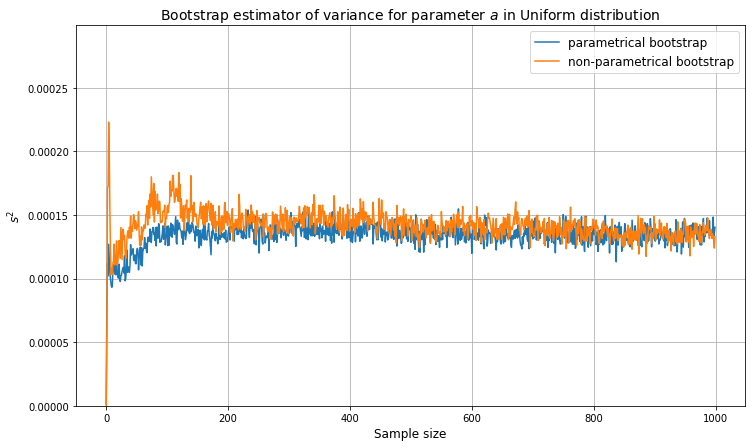

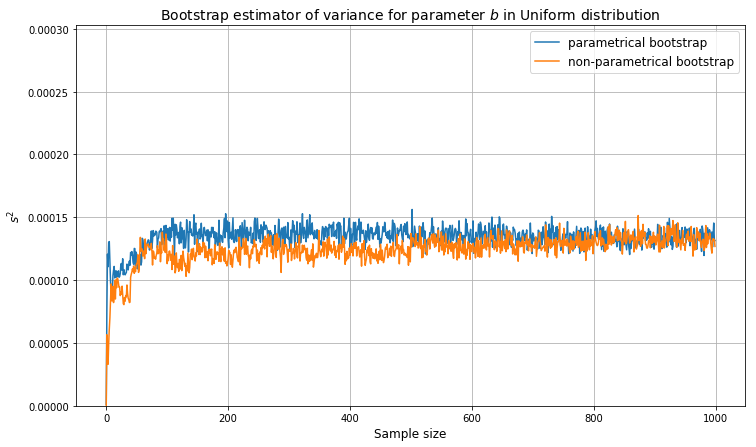

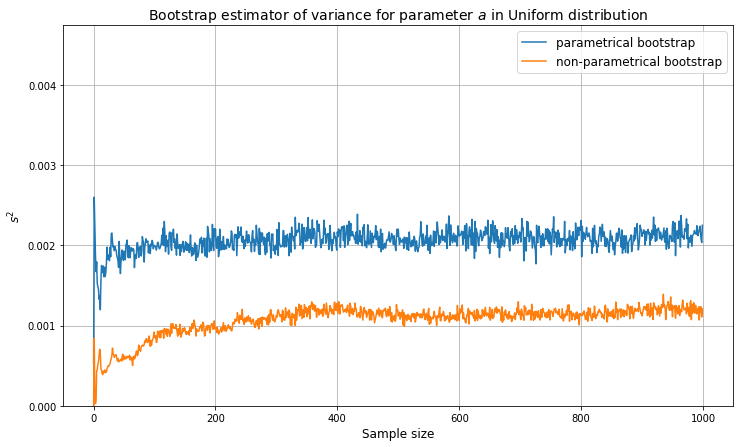

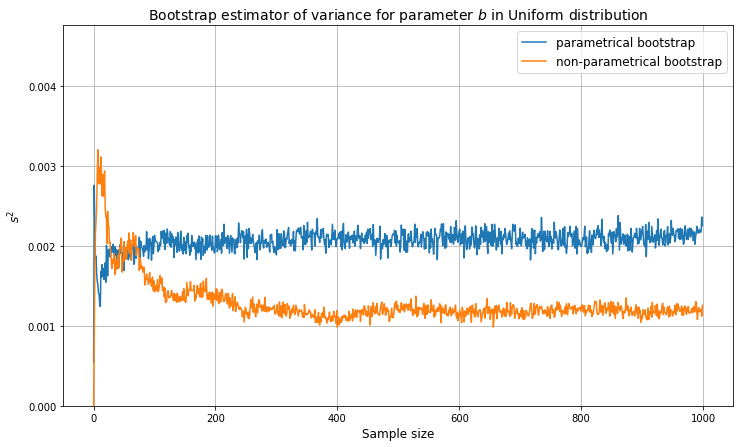

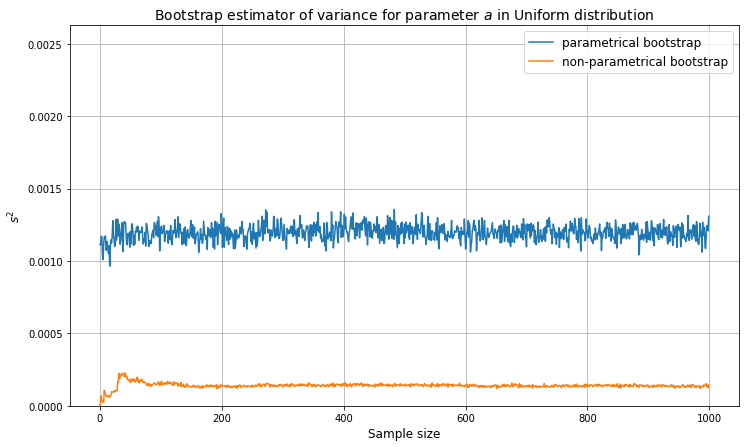

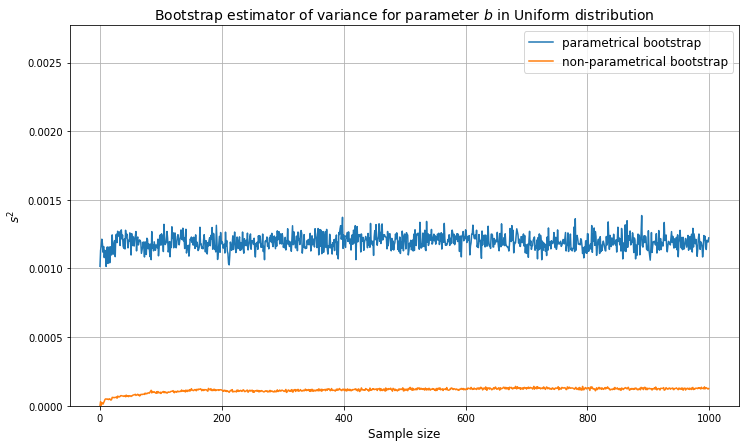

In [18]:
for j in range(N_series):
    make_plot(uniform_param_variances[j][0], uniform_non_param_variances[j][0], r'$a$', 'Uniform',
              ylim = 2 * max(np.max(uniform_param_variances[j][0][-200:]), np.max(uniform_non_param_variances[j][0][-200:])))
    make_plot(uniform_param_variances[j][1], uniform_non_param_variances[j][1], r'$b$', 'Uniform',
              ylim = 2 * max(np.max(uniform_param_variances[j][1][-200:]), np.max(uniform_non_param_variances[j][1][-200:])))

### Poisson distribution

In [19]:
# оценки по методу моментов
lambdas = np.zeros((N_series, N))

for j in range(N_series):
    lambdas[j] = np.array([samples_pois[j][:n].mean() for n in range(1, N + 1)])

In [20]:
%%time

poisson_non_param_variances = np.zeros((N_series, N))

#non parametric bootstrap
for j in range(N_series):
    poisson_non_param_variance = np.zeros(N)
    for i in range(1, N):
        poisson_non_param_sample = np.random.choice(samples_pois[j][:(i + 1)], size = (K, N))
        non_param_estimator = np.mean(poisson_non_param_sample, axis = 1)
        poisson_non_param_variance[i] = non_param_estimator.var()
    poisson_non_param_variances[j] = poisson_non_param_variance

CPU times: user 32.8 s, sys: 8.21 ms, total: 32.8 s
Wall time: 32.8 s


In [21]:
%%time

poisson_param_variances = np.zeros((N_series, N))

#parametric bootstrap
for j in range(N_series):
    poisson_param_variance = np.zeros(N)
    for i in range(N):
        poisson_param_sample = sts.poisson.rvs(lambdas[j][i], size = (K, N))
        param_estimator = np.mean(poisson_param_sample, axis = 1)
        poisson_param_variance[i] = param_estimator.var()
    poisson_param_variances[j] = poisson_param_variance

CPU times: user 8min 49s, sys: 6.24 s, total: 8min 55s
Wall time: 2min 13s


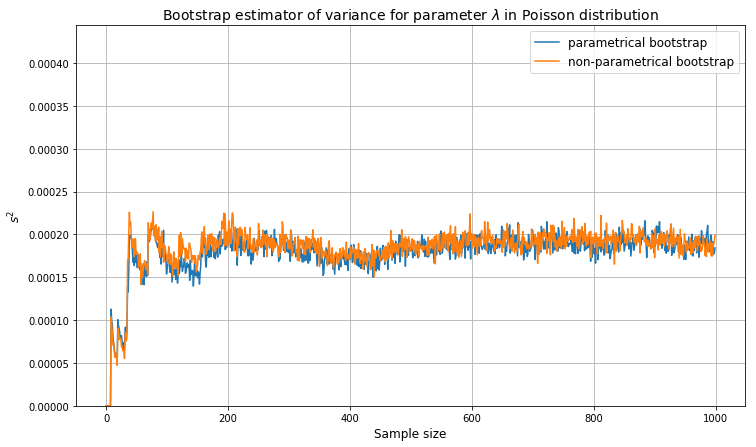

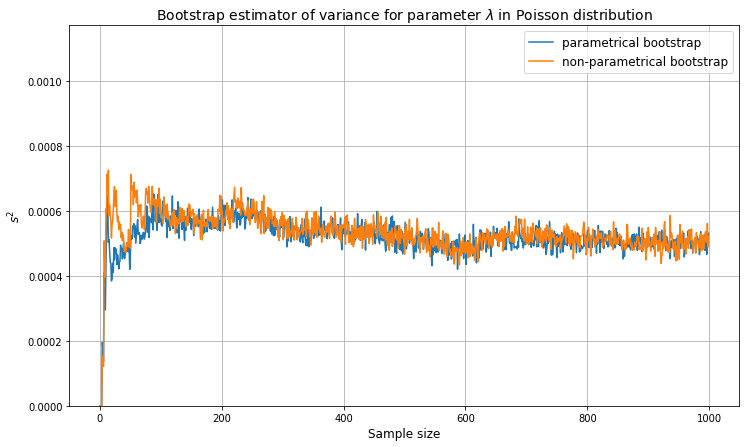

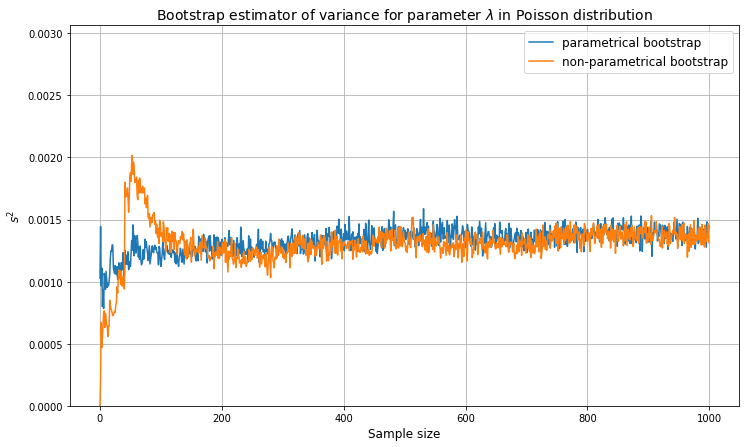

In [22]:
for j in range(N_series):
    make_plot(poisson_param_variances[j], poisson_non_param_variances[j], r'$\lambda$', 'Poisson',
              ylim = 2 * max(np.max(poisson_param_variances[j][-200:]), np.max(poisson_non_param_variances[j][-200:])))

### Binomial distribution

<div style="text-align: justify">
Оценки параметров биномиального распределения по методу моментов могут не лежать в пределах допустимых значений этих параметров. Так, оценка для $m$ или $p$ может быть отрицательной, оценка $m$ может быть не целым числом, что не позволяет правильно получать оценку дисперсии, используя бутстрепные выборки. Поэтому в решении используются разные оценки. Первая - полученная теоретически; в случае, если нужно было генерировать выборку и оценка получалась отрицательной, то брался модуль значения, а также бралась целая часть оценки $m$. Вторая оценка - найденная в источниках в интернете, где $newm = \max{\{m, X_{(n)}\}}$, $newb = \frac{\overline{X}}{m}$.
</div>

In [121]:
# оценки по методу моментов
m = np.zeros((N_series, N - 1))
p = np.zeros((N_series, N - 1))

for j in range(N_series):
    m[j] = np.array([(samples_bin[j][:n].mean() ** 2) / (samples_bin[j][:n].mean() - samples_bin[j][:n].var()) for n in range(2, N + 1)])
    p[j] = np.array([(samples_bin[j][:n].mean() - samples_bin[j][:n].var()) / samples_bin[j][:n].mean() for n in range(2, N + 1)])

In [109]:
# второй вариант оценок
new_m = np.zeros((N_series, N - 1))
new_p = np.zeros((N_series, N - 1))

for j in range(N_series):
    new_m[j] = np.array([max(m[j][n - 1], np.max(samples_bin[j][:n])) for n in range (1, N)])
    #new_p[j] = np.array([samples_bin[j][:n].mean() for n in range (1, N)]) / new_m[j]
    new_p[j] = np.where(p[j] < 0, samples_bin[j][:N].mean() / new_m[j], p[j])

In [110]:
%%time

bin_non_param_variances_new = np.zeros((N_series, 2, N - 1))

#non parametric bootstrap with new estimator
for j in range(N_series):
    bin_non_param_variance_new = np.zeros((2, N - 1))
    for i in range(1, N - 1):
        bin_non_param_sample = np.random.choice(samples_bin[j][:i], size = (K, N))
        m_non_param_estimator = (np.mean(bin_non_param_sample, axis = 1) ** 2) / (np.mean(bin_non_param_sample, axis = 1) - np.var(bin_non_param_sample, axis = 1))
        p_non_param_estimator = (np.mean(bin_non_param_sample, axis = 1) - np.var(bin_non_param_sample, axis = 1)) / np.mean(bin_non_param_sample, axis = 1)
        maxs = np.max(bin_non_param_sample, axis = 1)
        new_m_np = np.array([max(m_non_param_estimator[n], maxs[n]) for n in range(0, N)])
        new_p_np = np.where(p_non_param_estimator < 0, bin_non_param_sample[0].mean() / new_m_np, p_non_param_estimator)
        bin_non_param_variance_new[0][i] = new_m_np.var()
        bin_non_param_variance_new[1][i] = new_p_np.var()
    bin_non_param_variances_new[j][0] = bin_non_param_variance_new[0]
    bin_non_param_variances_new[j][1] = bin_non_param_variance_new[1]

CPU times: user 4min 33s, sys: 11.2 s, total: 4min 45s
Wall time: 1min 11s


In [111]:
%%time

bin_non_param_variances = np.zeros((N_series, 2, N - 1))

#non parametric bootstrap with first estimato
for j in range(N_series):r
    bin_non_param_variance = np.zeros((2, N - 1))
    for i in range(1, N - 1):
        bin_non_param_sample = np.random.choice(samples_bin[j][:i], size = (K, N))
        m_non_param_estimator = (np.mean(bin_non_param_sample, axis = 1) ** 2) / (np.mean(bin_non_param_sample, axis = 1) - np.var(bin_non_param_sample, axis = 1))
        p_non_param_estimator = (np.mean(bin_non_param_sample, axis = 1) - np.var(bin_non_param_sample, axis = 1)) / np.mean(bin_non_param_sample, axis = 1)
        bin_non_param_variance[0][i] = m_non_param_estimator.var()
        bin_non_param_variance[1][i] = p_non_param_estimator.var()
    bin_non_param_variances[j][0] = bin_non_param_variance[0]
    bin_non_param_variances[j][1] = bin_non_param_variance[1]

CPU times: user 4min 20s, sys: 10.8 s, total: 4min 31s
Wall time: 1min 7s


In [112]:
%%time

bin_param_variances_new = np.zeros((N_series, 2, N - 1))

#parametric bootstrap with new estimator
for j in range(N_series):
    bin_param_variance_new = np.zeros((2, N - 1))
    for i in range(N - 1):
        bin_param_sample = sts.binom.rvs(int(new_m[j][i]), new_p[j][i], size = (K, N))
        print bin_
        m_param_estimator = (np.mean(bin_param_sample, axis = 1) ** 2) / (np.mean(bin_param_sample, axis = 1) - np.var(bin_param_sample, axis = 1))
        p_param_estimator = (np.mean(bin_param_sample, axis = 1) - np.var(bin_param_sample, axis = 1)) / np.mean(bin_param_sample, axis = 1)
        maxs = np.max(bin_param_sample, axis = 1)
        new_m_p = np.array([max(m_param_estimator[n], maxs[n]) for n in range(0, N)])
        new_p_p = np.where(p_param_estimator < 0, bin_param_sample[0].mean() / new_m_p, p_param_estimator)
        bin_param_variance_new[0][i] = new_m_p.var()
        bin_param_variance_new[1][i] = new_p_p.var()
    bin_param_variances_new[j][0] = bin_param_variance_new[0]
    bin_param_variances_new[j][1] = bin_param_variance_new[1]

CPU times: user 30min 26s, sys: 24.2 s, total: 30min 51s
Wall time: 7min 42s


In [113]:
%%time

bin_param_variances = np.zeros((N_series, 2, N - 1))

#parametric bootstrap with first estimator
for j in range(N_series):
    bin_param_variance = np.zeros((2, N - 1))
    for i in range(N - 1):
        bin_param_sample = sts.binom.rvs(int(np.fabs(m[j][i])), np.fabs(p[j][i]), size = (K, N))
        m_param_estimator = (np.mean(bin_param_sample, axis = 1) ** 2) / (np.mean(bin_param_sample, axis = 1) - np.var(bin_param_sample, axis = 1))
        p_param_estimator = (np.mean(bin_param_sample, axis = 1) - np.var(bin_param_sample, axis = 1)) / np.mean(bin_param_sample, axis = 1)
        bin_param_variance[0][i] = m_param_estimator.var()
        bin_param_variance[1][i] = p_param_estimator.var()
    bin_param_variances[j][0] = bin_param_variance[0]
    bin_param_variances[j][1] = bin_param_variance[1]

CPU times: user 30min 35s, sys: 35.5 s, total: 31min 10s
Wall time: 7min 47s


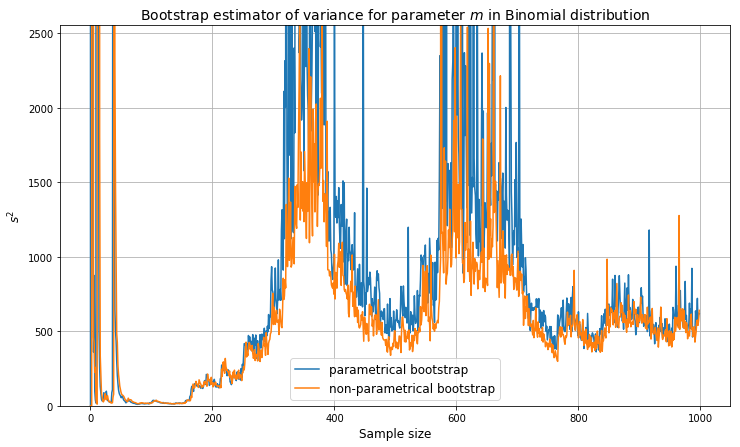

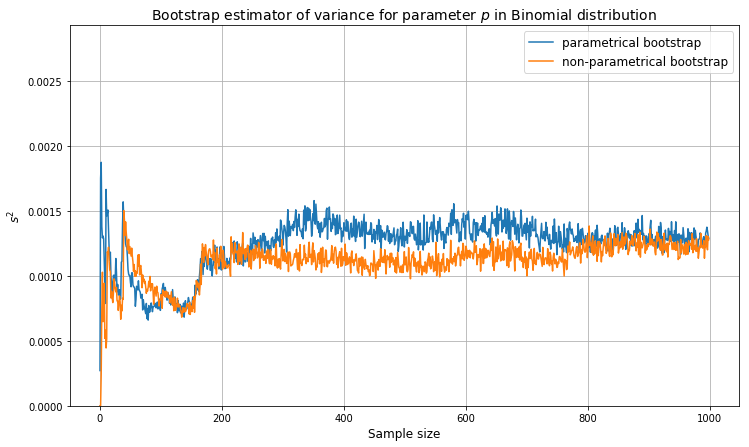

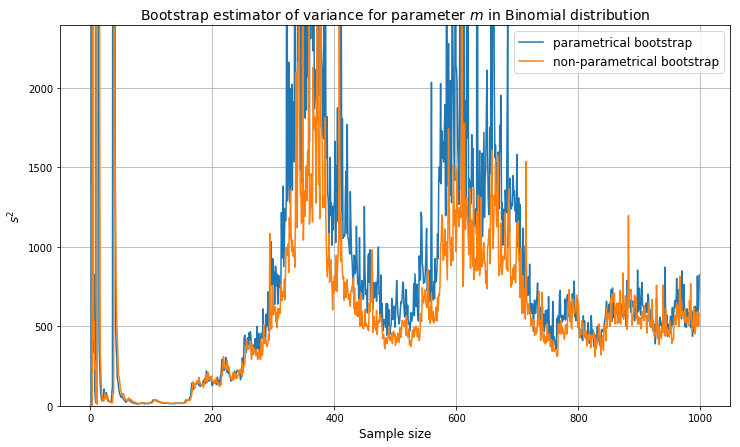

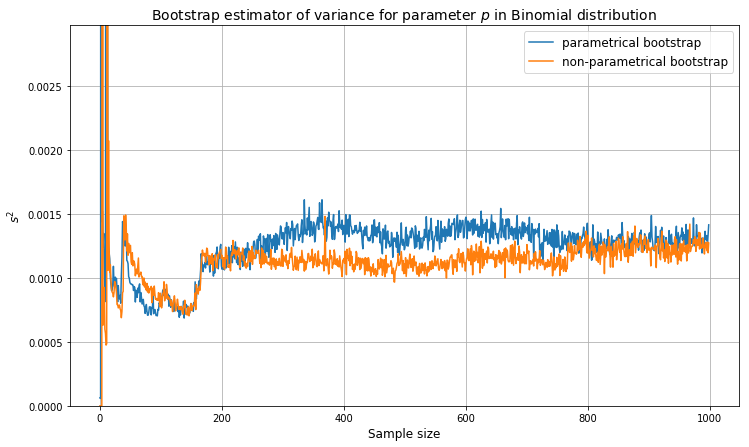

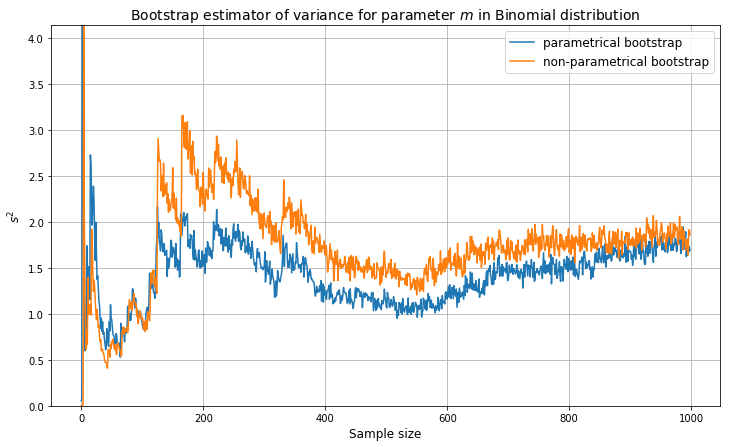

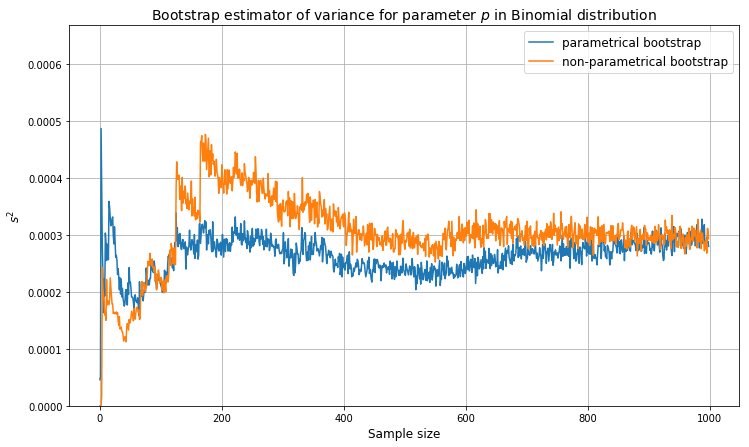

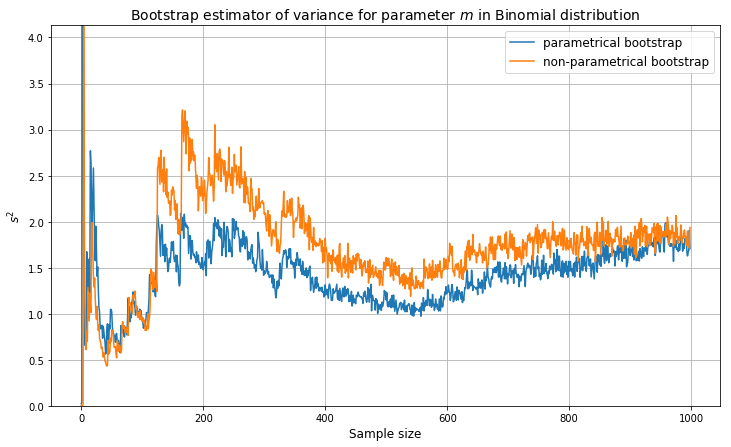

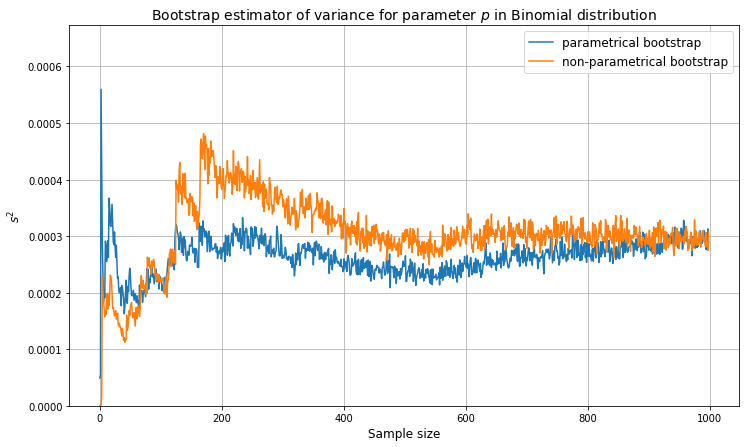

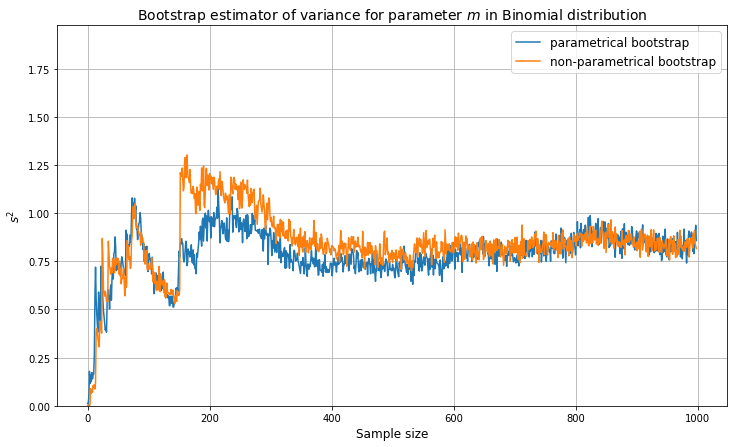

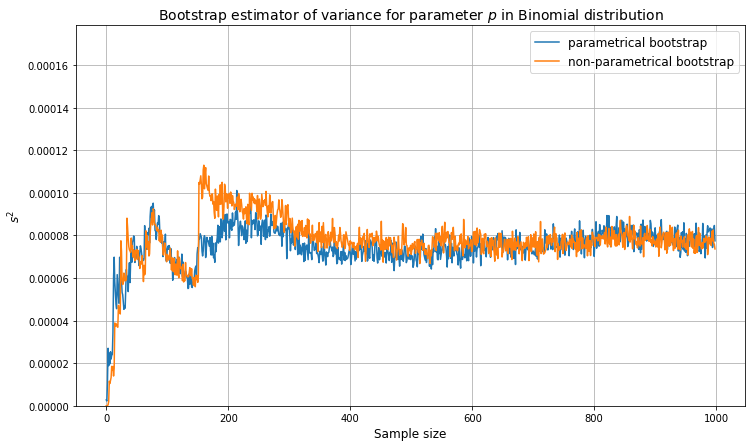

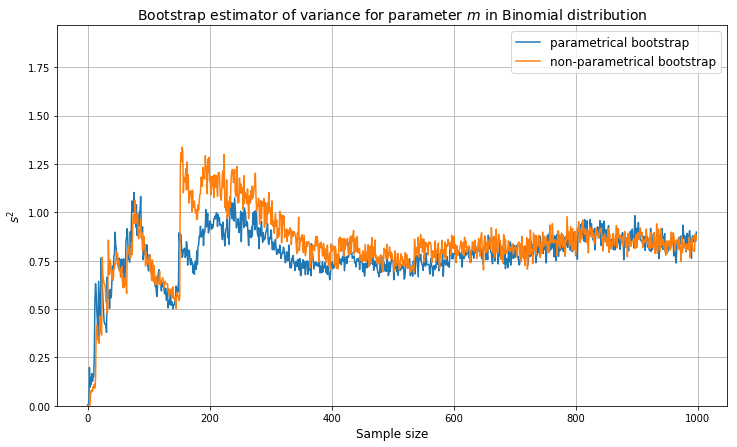

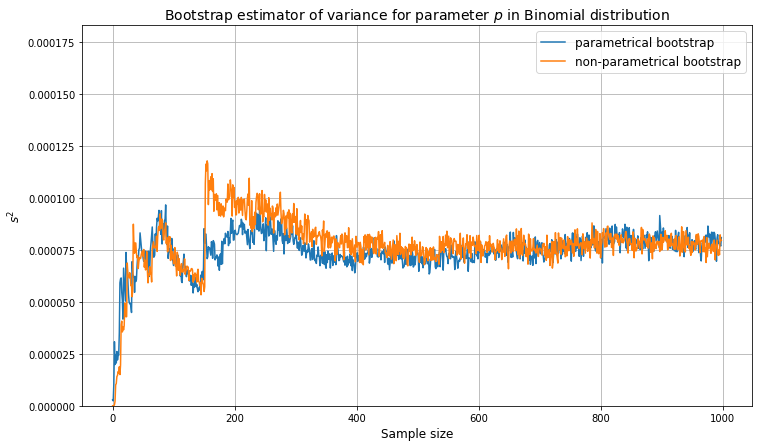

In [115]:
for j in range(N_series):
    make_plot(bin_param_variances[j][0], bin_non_param_variances[j][0], r'$m$', 'Binomial',
              ylim = 2 * max(np.max(bin_param_variances[j][0][-200:]), np.max(bin_non_param_variances[j][0][-200:])))
    make_plot(bin_param_variances[j][1], bin_non_param_variances[j][1], r'$p$', 'Binomial',
              ylim = 2 * max(np.max(bin_param_variances[j][1][-200:]), np.max(bin_non_param_variances[j][1][-200:])))
    make_plot(bin_param_variances_new[j][0], bin_non_param_variances_new[j][0], r'$m$', 'Binomial',
              ylim = 2 * max(np.max(bin_param_variances_new[j][0][-200:]), np.max(bin_non_param_variances_new[j][0][-200:])))
    make_plot(bin_param_variances_new[j][1], bin_non_param_variances_new[j][1], r'$p$', 'Binomial',
              ylim = 2 * max(np.max(bin_param_variances_new[j][1][-200:]), np.max(bin_non_param_variances_new[j][1][-200:])))

### Geometrical distribution

In [30]:
# оценки по методу моментов
p = np.zeros((N_series, N))

for j in range(N_series):
    p[j] = np.array([1 / (samples_geom[j][:n].mean() + 1) for n in np.cumsum(np.ones(N, int))])

In [31]:
%%time

geom_non_param_variances = np.zeros((N_series, N))

#non parametric bootstrap
for j in range(N_series):
    geom_non_param_variance = np.zeros(N)
    for i in range(1, N):
        geom_non_param_sample = np.random.choice(samples_geom[j][:(i + 1)], size = (K, N))
        geom_non_param_estimator = 1 / (np.mean(geom_non_param_sample, axis = 1) + 1)
        geom_non_param_variance[i] = geom_non_param_estimator.var() 
    geom_non_param_variances[j] = geom_non_param_variance

CPU times: user 33 s, sys: 5.95 s, total: 39 s
Wall time: 39 s


In [32]:
%%time

geom_param_variances = np.zeros((N_series, N))

#parametric bootstrap
for j in range(N_series):
    geom_param_variance = np.zeros(N)
    for i in range(N):
        geom_param_sample = sts.geom.rvs(p[j][i], size = (K, N))
        geom_param_estimator = 1 / (np.mean(geom_param_sample, axis = 1) + 1)
        geom_param_variance[i] = geom_param_estimator.var()
    geom_param_variances[j] = geom_param_variance

CPU times: user 9min 15s, sys: 7.42 s, total: 9min 23s
Wall time: 2min 20s


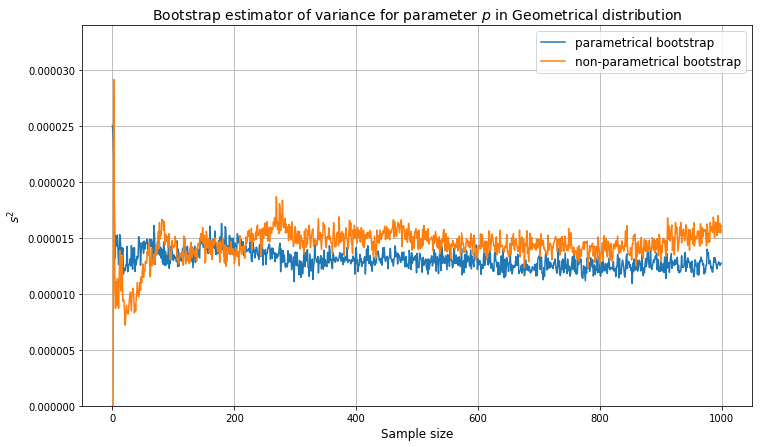

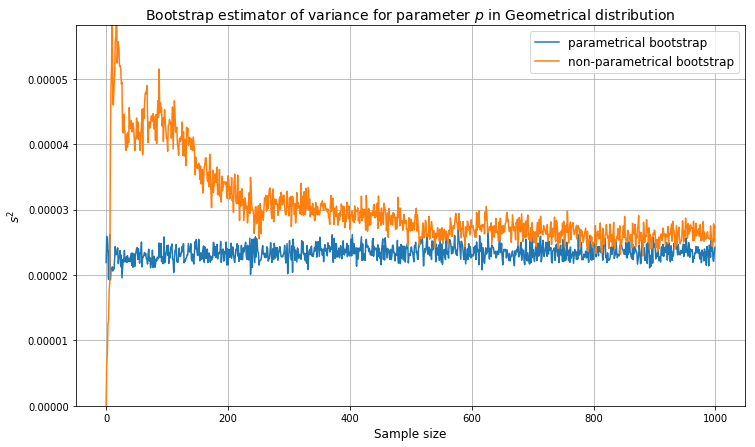

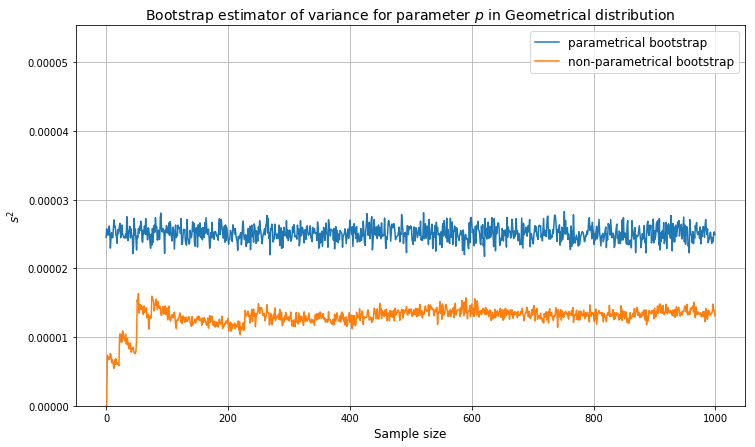

In [33]:
for j in range(N_series):
    make_plot(geom_param_variances[j], geom_non_param_variances[j], r'$p$', 'Geometrical',
              ylim = 2 * max(np.max(geom_param_variances[j][-200:]), np.max(geom_non_param_variances[j][-200:])))

### Beta distribution

In [34]:
# оценки по методу моментов
alpha = np.zeros((N_series, N - 1))
beta = np.zeros((N_series, N - 1))

for j in range(N_series):
    alpha[j] = np.array([samples_beta[j][:n].mean() * (samples_beta[j][:n].mean() - (samples_beta[j][:n] ** 2).mean()) / samples_beta[:n].var() for n in range(2, N + 1)])
    beta[j] = np.array([(1 - samples_beta[j][:n].mean()) * (samples_beta[j][:n].mean() - (samples_beta[j][:n] ** 2).mean()) / samples_beta[j][:n].var() for n in range(2, N + 1)])

In [35]:
%%time

beta_non_param_variances = np.zeros((N_series, 2, N - 1))

#non parametric bootstrap
for j in range(N_series):
    beta_non_param_variance = np.zeros((2, N - 1))
    for i in range(N - 1):
        beta_non_param_sample = np.random.choice(samples_beta[j][:(i + 2)], size = (K, N))
        alpha_estimator = np.mean(beta_non_param_sample, axis = 1) * (np.mean(beta_non_param_sample, axis = 1) - np.mean(beta_non_param_sample ** 2, axis = 1)) / np.var(beta_non_param_sample, axis = 1)
        beta_estimator = (1 - np.mean(beta_non_param_sample, axis = 1)) * (np.mean(beta_non_param_sample, axis = 1) - np.mean(beta_non_param_sample ** 2, axis = 1)) / np.var(beta_non_param_sample, axis = 1)
        beta_non_param_variance[0][i] = alpha_estimator.var()
        beta_non_param_variance[1][i] = beta_estimator.var()
    beta_non_param_variances[j][0] = beta_non_param_variance[0]
    beta_non_param_variances[j][1] = beta_non_param_variance[1]

CPU times: user 4min 29s, sys: 10.9 s, total: 4min 40s
Wall time: 1min 10s


In [36]:
%%time

beta_param_variances = np.zeros((N_series, 2, N - 1))
                                
for j in range(N_series):
    #parametric bootstrap
    beta_param_variance = np.zeros((2, N - 1))
    for i in range(N - 1):
        beta_param_sample = sts.beta.rvs(alpha[j][i], beta[j][i], size = (K, N))
        alpha_estimator = np.mean(beta_param_sample, axis = 1) * (np.mean(beta_param_sample, axis = 1) - np.mean(beta_param_sample ** 2, axis = 1)) / np.var(beta_param_sample, axis = 1)
        beta_estimator = (1 - np.mean(beta_param_sample, axis = 1)) * (np.mean(beta_param_sample, axis = 1) - np.mean(beta_param_sample ** 2, axis = 1)) / np.var(beta_param_sample, axis = 1)
        beta_param_variance[0][i] = alpha_estimator.var()
        beta_param_variance[1][i] = beta_estimator.var()
    beta_param_variances[j][0] = beta_param_variance[0]
    beta_param_variances[j][1] = beta_param_variance[1]

CPU times: user 33min 55s, sys: 25.5 s, total: 34min 21s
Wall time: 8min 57s


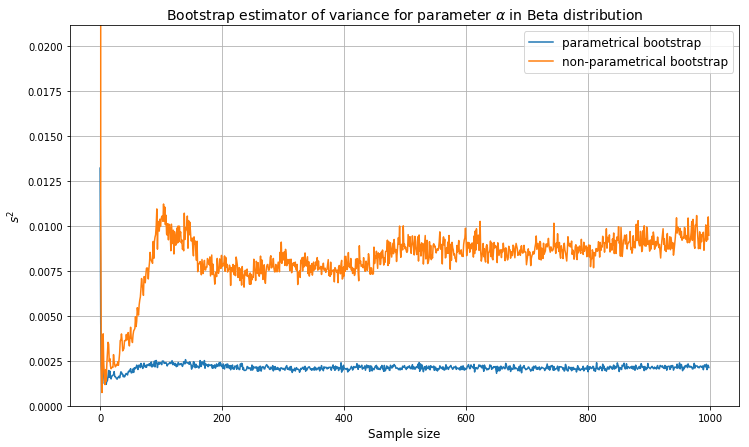

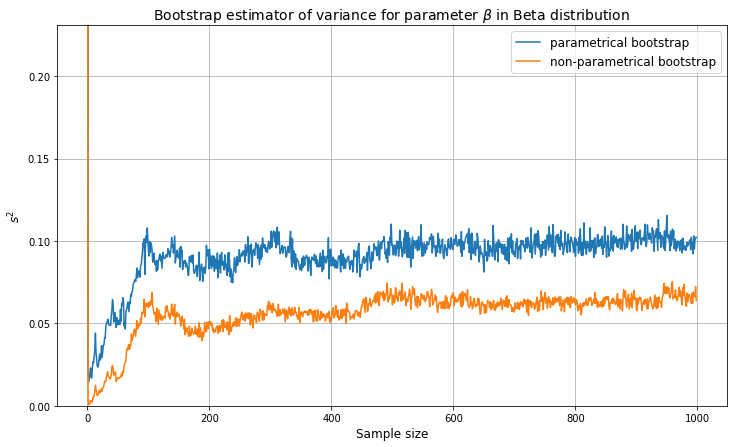

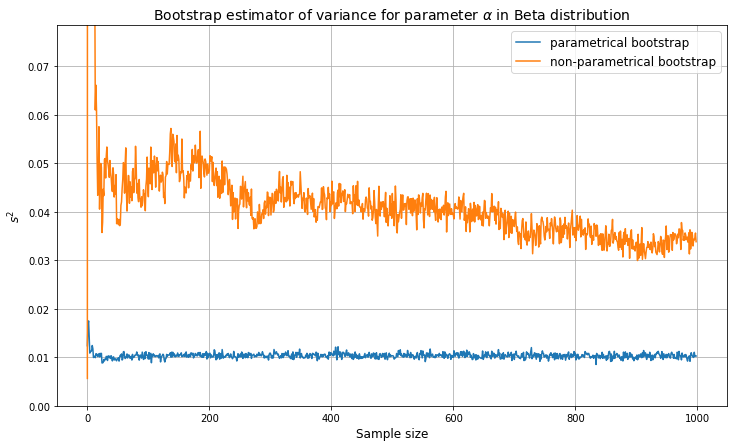

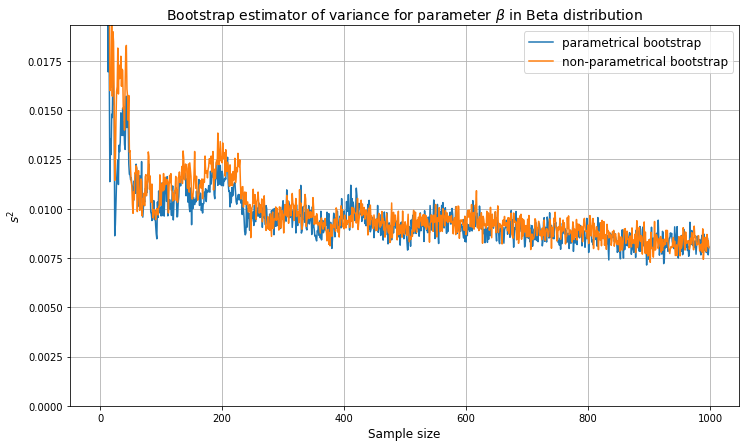

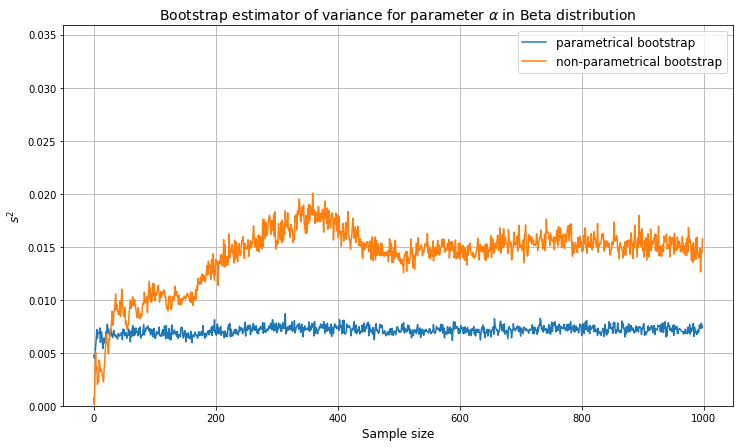

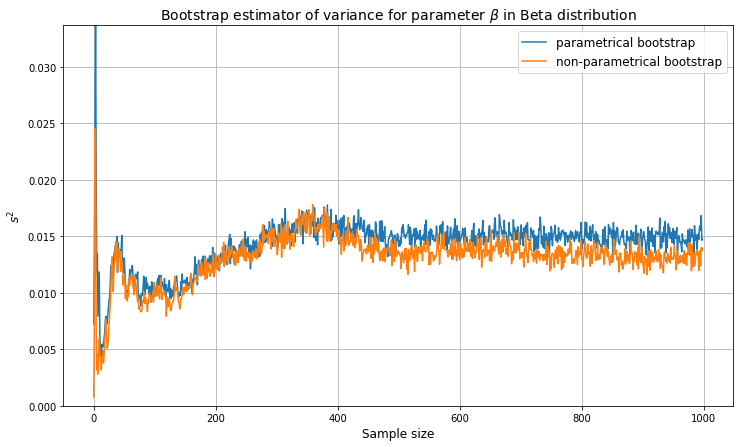

In [37]:
for j in range(N_series):
    make_plot(beta_param_variances[j][0], beta_non_param_variances[j][0], r'$\alpha$', 'Beta',
              ylim = 2 * max(np.max(beta_param_variances[j][0][-200:]), np.max(beta_non_param_variances[j][0][-200:])))
    make_plot(beta_param_variances[j][1], beta_non_param_variances[j][1], r'$\beta$', 'Beta',
              ylim = 2 * max(np.max(beta_param_variances[j][1][-200:]), np.max(beta_non_param_variances[j][1][-200:])))

### Pareto distribution

In [38]:
# оценки по методу моментов
gamma = np.zeros((N_series, N))

for j in range(N_series):
    gamma[j] = np.array([samples_pareto[j][:n].mean() / (samples_pareto[j][:n].mean() - 1) for n in range(1, N + 1)])

In [39]:
%%time

pareto_non_param_variances = np.zeros((N_series, N))

for j in range(N_series):
    #non parametric bootstrap
    pareto_non_param_variance = np.zeros(N)
    for i in range(1, N):
        pareto_non_param_sample = np.random.choice(samples_pareto[j][:(i + 1)], size = (K, N))
        pareto_non_param_estimator = np.mean(pareto_non_param_sample, axis = 1) / (np.mean(pareto_non_param_sample, axis = 1) - 1)
        pareto_non_param_variance[i] = pareto_non_param_estimator.var()  
    pareto_non_param_variances[j] = pareto_non_param_variance

CPU times: user 37.7 s, sys: 6.73 s, total: 44.4 s
Wall time: 44.4 s


In [40]:
%%time

pareto_param_variances = np.zeros((N_series, N))

#parametric bootstrap
for j in range(N_series):
    pareto_param_variance = np.zeros(N)
    for i in range(N):
        pareto_param_sample = sts.pareto.rvs(gamma[j][i], size = (K, N))
        pareto_param_estimator = np.mean(pareto_param_sample, axis = 1) / (np.mean(pareto_param_sample, axis = 1) - 1)
        pareto_param_variance[i] = pareto_param_estimator.var()
    pareto_param_variances[j] = pareto_param_variance

CPU times: user 16min 29s, sys: 30.7 s, total: 17min
Wall time: 4min 15s


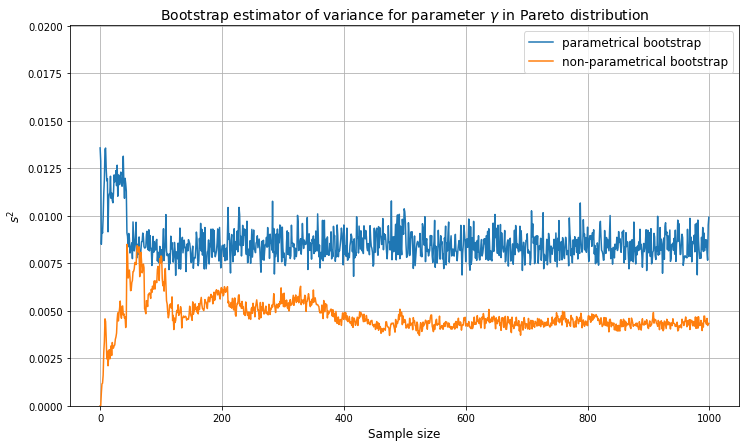

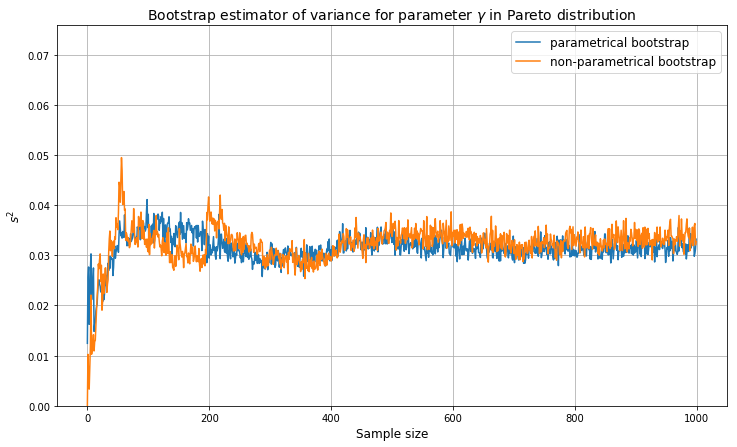

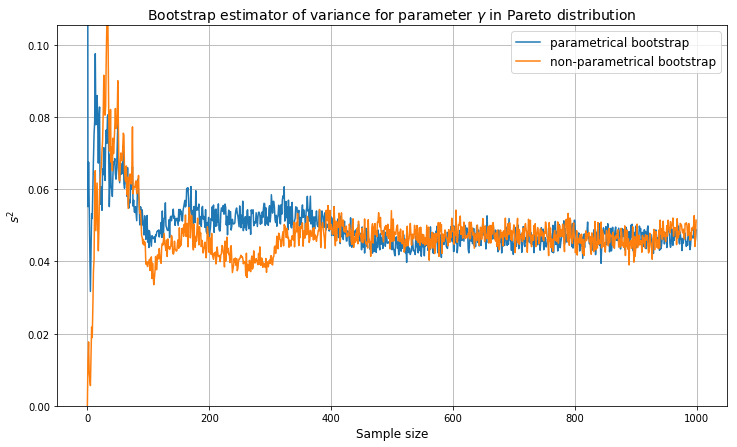

In [41]:
for j in range(N_series):
    make_plot(pareto_param_variances[j], pareto_non_param_variances[j], r'$\gamma$', 'Pareto',
              ylim = 2 * max(np.max(pareto_param_variances[j][-200:]), np.max(pareto_non_param_variances[j][-200:])))

### Cauchy distribution

In [42]:
# оценки по методу моментов
indicator = np.zeros((N_series, N))
theta = np.zeros((N_series, N))

for j in range(N_series):
    indicator[j] = np.logical_and(samples_cauchy[j] >= 0, samples_cauchy[j] <= 1)
    theta[j] = np.array([1 / (np.tan(np.pi * indicator[j][:n].mean())) for n in range(1, N + 1)])

/home/ilya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [43]:
%%time

cauchy_non_param_variances = np.zeros((N_series, N))

#non parametric bootstrap
for j in range(N_series):
    cauchy_non_param_variance = np.zeros(N)
    for i in range(1, N):
        cauchy_non_param_sample = np.random.choice(samples_cauchy[j][:(i + 1)], size = (K, N))
        indicator_param = np.logical_and(cauchy_non_param_sample >= 0, cauchy_non_param_sample <= 1)
        cauchy_non_param_estimator = 1 / (np.tan(np.pi * np.mean(indicator_param, axis = 1)))
        cauchy_non_param_variance[i] = cauchy_non_param_estimator.var()  
    cauchy_non_param_variances[j] = cauchy_non_param_variance

/home/ilya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


CPU times: user 43.9 s, sys: 5.13 s, total: 49 s
Wall time: 49.2 s


In [44]:
%%time

cauchy_param_variances = np.zeros((N_series, N))

#parametric bootstrap
for j in range(N_series):
    cauchy_param_variance = np.zeros(N)
    for i in range(N):
        cauchy_param_sample = sts.cauchy.rvs(scale = np.abs(theta[j][i]), size = (K, N))
        indicator_param = np.logical_and(cauchy_param_sample >= 0, cauchy_param_sample <= 1)
        cauchy_param_estimator = 1 / (np.tan(np.pi * np.mean(indicator_param, axis = 1)))
        cauchy_param_variance[i] = cauchy_param_estimator.var()
    cauchy_param_variances[j] = cauchy_param_variance

/home/ilya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.


CPU times: user 3min 21s, sys: 19.5 s, total: 3min 41s
Wall time: 55.6 s


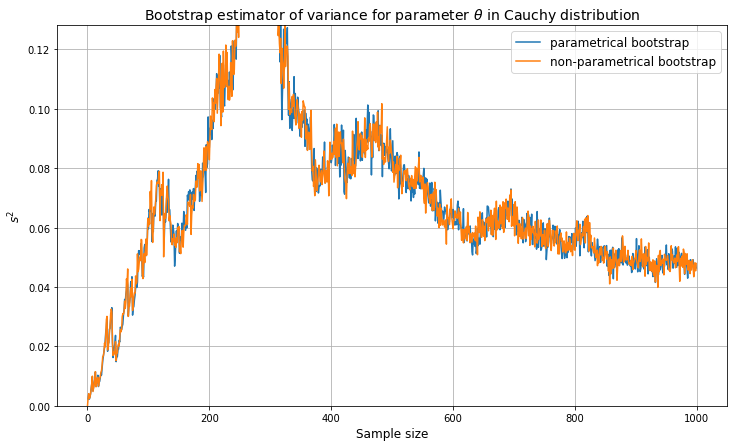

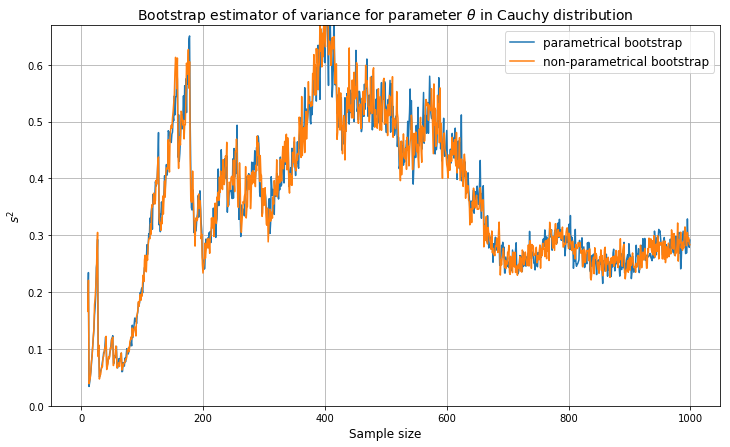

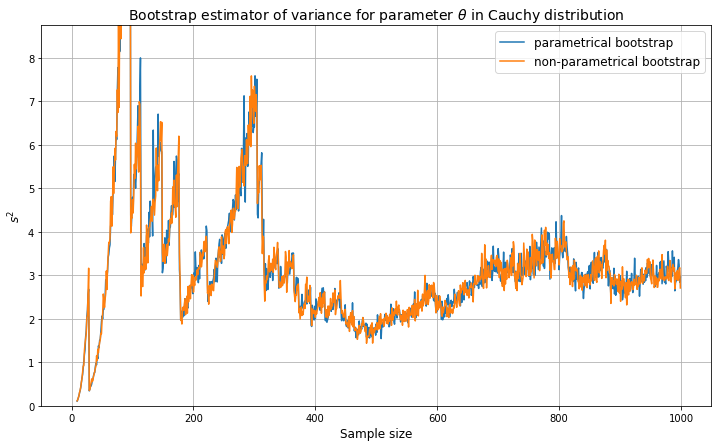

In [45]:
for j in range(N_series):    
    make_plot(cauchy_param_variances[j], cauchy_non_param_variances[j], r'$\theta$', 'Cauchy',
              ylim = 2 * max(np.max(cauchy_param_variances[j][-200:]), np.max(cauchy_non_param_variances[j][-200:])))

### Вывод

<div style="text-align:justify">
По построенным графикам бутстрепной оценки дисперсии можно сделать вывод, что для большинства распределений теоретические оценки по методу моментов являются верными, значения оценки дисперсии стремятся к нулю с ростом размера выборки. Для биномиального распределения были описаны возможные плохие результаты расчетов оценок и дисперсии.
</div>

## Задача 2

<div style="text-align: justify">
На высоте 1 метр от поверхности Земли закреплено устройство, которое периодически излучает лучи на поверхность Земли (считайте, что поверхность Земли представляет из себя прямую). Пусть $l$ -- перпендикуляр к поверхности Земли, опущенный из точки, в которой закреплено устройство. Угол к прямой $l$ (под которым происходит излучение) устройство выбирает случайно из равномерного распределения на отрезке $(-\pi/2, \pi/2)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения с поверхностью имеют распределение Коши плотностью $p(x) = \frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$ соответствует проекции точки расположения устройства на поверхность Земли (направление оси и начало координат на поверхности Земли выбраны заранее некоторым образом независимо от расположения устройства). В файле Cauchy.csv находятся координаты точек пересечения лучей с поверхностью Земли. Оцените параметр сдвига методом максимального правдоподобия a) по половине выборки (первые 500 элементов выборки, т.е. выборка состоит из 1000 наблюдений); б) по всей выборке. Оценку произведите по сетке (т.е. возьмите набор точек с некоторым шагом и верните ту, на которой достигается максимум функции правдоподобия). Известно, что параметр масштаба принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Если получается долго или не хватает памяти, то уменьшите интервал поиска и поясните (в комментариях), почему берете именно такой интервал.
</div>

#### Логарифмическая функция правдоподобия

Функция правдоподобия имеет вид $$u_{\theta}(X) = \prod_{i = 1}^{n} \frac{1}{\pi (1 + (X_{i} - \theta)^{2})}.$$
Логарифмическая функция правдоподобия имеет вид $$L_{\theta}(X) = -n\ln{\pi} - \sum_{i = 1}^{n} \ln{(1 + (X_{i} - \theta)^{2})}.$$

In [13]:
#задаем границы отрезка и шаг
border = 1000.
step = 0.01

<div style="text-align: justify">
Найдем такое значение параметра сдвига $x_0$, при котором функция правдопободия принимает максимальное значение. Для этого используем логарифмическую фукнцию правдоподобия, предварительно изменив в ней знак и не учитывая константу. Тогда будем искать минимум такой функции, что соответствует максимуму первоначальной функции правдоподобия. Функция ниже реализует эту идею.
</div>

In [14]:
def find_max_arg_cauchy(sample):
    argmin = 0
    f_min = np.sum(np.log(1. + (sample - argmin) ** 2))
    x = -border
    while x <= border:
        f_x = np.sum(np.log(1. + (sample - x) ** 2))
        if (f_x < f_min):
            f_min = f_x
            argmin = x
        x += step
    return argmin

In [15]:
#импортируем файл в numpy массив
cauchy_data = np.genfromtxt('Cauchy.csv', delimiter = ',')
print cauchy_data.shape

(1000,)


In [25]:
x = np.arange(-border, border, step)
f_x = np.array([np.sum(np.log(1. + (cauchy_data - elem) ** 2)) for elem in x])
print x[np.argmin(f_x)]

662.0499999984884


In [49]:
#находим значение параметра сдвига по методу максимального правдоподобия по половине выборки
param_half_sample = find_max_arg_cauchy(cauchy_data[:(len(cauchy_data) / 2)])

print('Shift parameter for the half of the sample is {}'.format(param_half_sample))

Shift parameter for the half of the sample is 662.039999999


In [50]:
#находим значение параметра сдвига по методу максимального правдоподобия по всей выборке
param_full_sample = find_max_arg_cauchy(cauchy_data)

print('Shift parameter for the full sample is {}'.format(param_full_sample))

Shift parameter for the full sample is 662.049999999


### Вывод

Полученные оценки параметра сдвига с помощью метода максимального правдоподобия для половины выборки и для целой выборки получились практически одинаковыми.

## Задача 3

<div style="text-align: justify">
В банке каждую минуту подсчитывается баланс по сравнению с началом дня (6 часов утра). В полночь работники банка измеряют две величины: $X^1$ - максимальное значение баланса за день, $X^2$ - значение баланса в полночь. Считается, что величина $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ - параметр формы. В течение 10 лет каждый день банк проводил измерение величины $X,$ получив в результате выборку $X_1, \ldots, X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения. Оцените параметр формы методом максимального правдоподобия a) по первым 4 годам; б) по всей выборке. Оценку произведите по сетке (в логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$ Выберите шаг равным $10^{-3}.$
</div>

#### Логарифмическая функция правдоподобия

Плотность распределения Вейбулла равна $$p(x) = \gamma x^{\gamma - 1} e^{-x^{\gamma}}.$$
Функция правдоподобия равна $$u_{\gamma}(X) = \prod_{i = 1}^{n} \gamma X_{i}^{\gamma - 1} e^{-X_{i}^{\gamma}}.$$
Логарифмическая функция правдоподобия равна $$L_{\gamma}(X) = n\ln{\gamma} + (\gamma - 1)\sum_{i = 1}^{n} \ln{X_{i}} - \sum_{i = 1}^{n} X_{i}^{\gamma}.$$

In [57]:
#задаем границы отрезка и шаг
border = 2.
step = 0.001

<div style="text-align: justify">
Найдем значение параметра формы с помощью метода максимального правдоподобия, будем искать максимум логарифмической функции правдоподобия и значение аргумента, на котором оно достигается.
</div>

In [71]:
def find_max_arg_weibull(sample):
    size = sample.shape[0]
    argmax = 0.01
    
    #логарифмическая функция правдоподобия
    f_max = size * np.log(argmax) + (argmax - 1) * np.sum(np.log(sample)) - np.sum(sample ** argmax)
    
    x = -border
    while x <= border:
        f_x = size * np.log(10 ** x) + (10 ** x - 1) * np.sum(np.log(sample)) - np.sum(sample ** (10 ** x))
        if f_x >= f_max:
            f_max = f_x
            argmax = x
        x += step
    return 10 ** argmax

In [72]:
#импортируем файл в numpy массив
weibull_data = np.genfromtxt('Weibull.csv', delimiter = ',')
print weibull_data.shape
print weibull_data[:10]

(3652,)
[0.29 1.52 0.54 0.   0.75 0.38 0.16 0.   0.31 0.33]


Заметим, что в полученном массиве есть нули. Избавимся от них, заменив их значениями близкими к нулю.

In [73]:
weibull_data = np.where(weibull_data == 0., 1e-8, weibull_data)

In [74]:
#находим значение параметра формы по первым четырем годам
shape_param_four_years = find_max_arg_weibull(weibull_data[:(365 * 4 + 1)])

print('Shape parameter for the first four years is {}'.format(shape_param_four_years))

Shape parameter for the first four years is 0.269773943244


In [75]:
#находим значение параметра формы по всей выборке
shape_param_all_years = find_max_arg_weibull(weibull_data)

print('Shape parameter for the first four years is {}'.format(shape_param_all_years))

Shape parameter for the first four years is 0.264850013861


### Вывод

<div style="text-align:justify">
Полученные оценки параметра формы с помощью метода максимального правдоподобия для первых четырех лет и для целой выборки получились практически одинаковыми. Также оценки параметра формы довольно сильно зависят от степени приближения нулевых значений в выборке к нулю.
</div>